In [1]:
# import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Get the data

In [2]:
#@title METHOD 1: Fetch S&P 500 Data

# Fetch SPX (S&P 500 Index) data for the last 20 years
ticker = "^GSPC"  # This is Yahoo Finance's symbol for S&P 500
start_date = "2000-01-01"
end_date = "2025-01-01"

df = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# clean and reformat the data
# remove multi index
df.columns = df.columns.get_level_values(0)
# Reset index to make 'Date' a column
df = df.reset_index()

df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
1,2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2,2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
3,2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
4,2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [3]:
#@title METHOD 2: Read from a CSV file
# alternatively, read from a CSV file
df = pd.read_csv("../data/spx_data.csv", index_col=0)

df.head()

,Date,Close,High,Low,Open,Volume
0,2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
1,2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2,2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
3,2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
4,2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


***

In [4]:
# Daily return
df['Return'] = df['Close'].pct_change()

# Log return
df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))

df.head()

,Date,Close,High,Low,Open,Volume,Return,Log Return
0,2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000,NaN,NaN
1,2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000,-0.038345,-0.039099
2,2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000,0.001922,0.001920
3,2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000,0.000956,0.000955
4,2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000,0.027090,0.026730


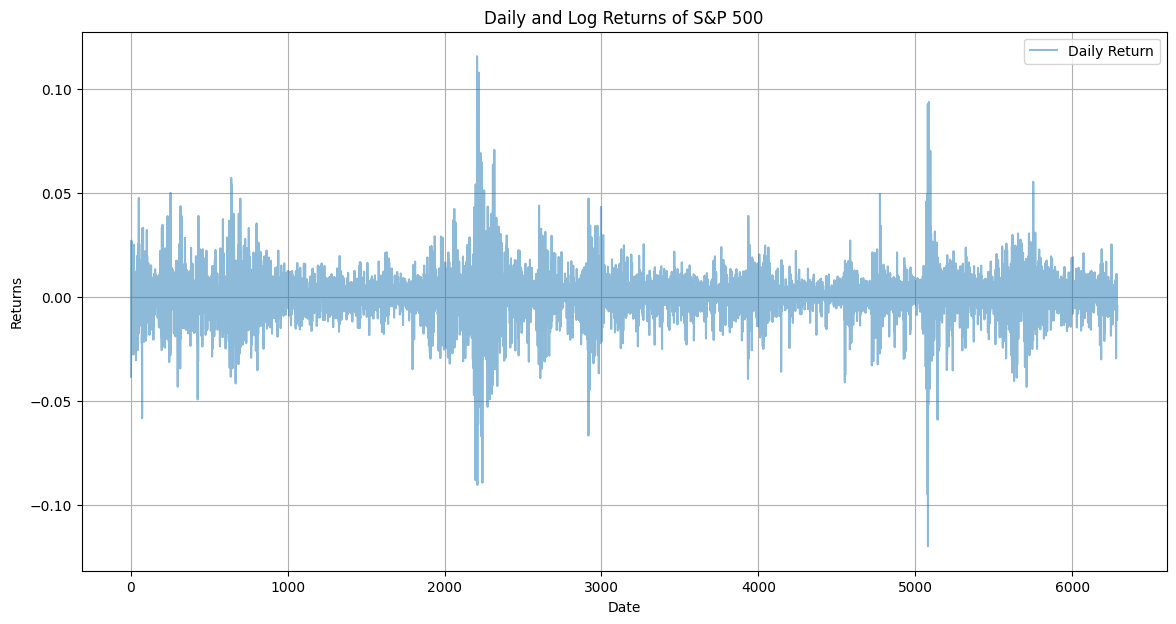

In [ ]:
# plot return and log returns
plt.figure(figsize=(14, 7))
plt.plot(df['Return'], label='Daily Return', alpha=0.5)
plt.title('Daily and Log Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()

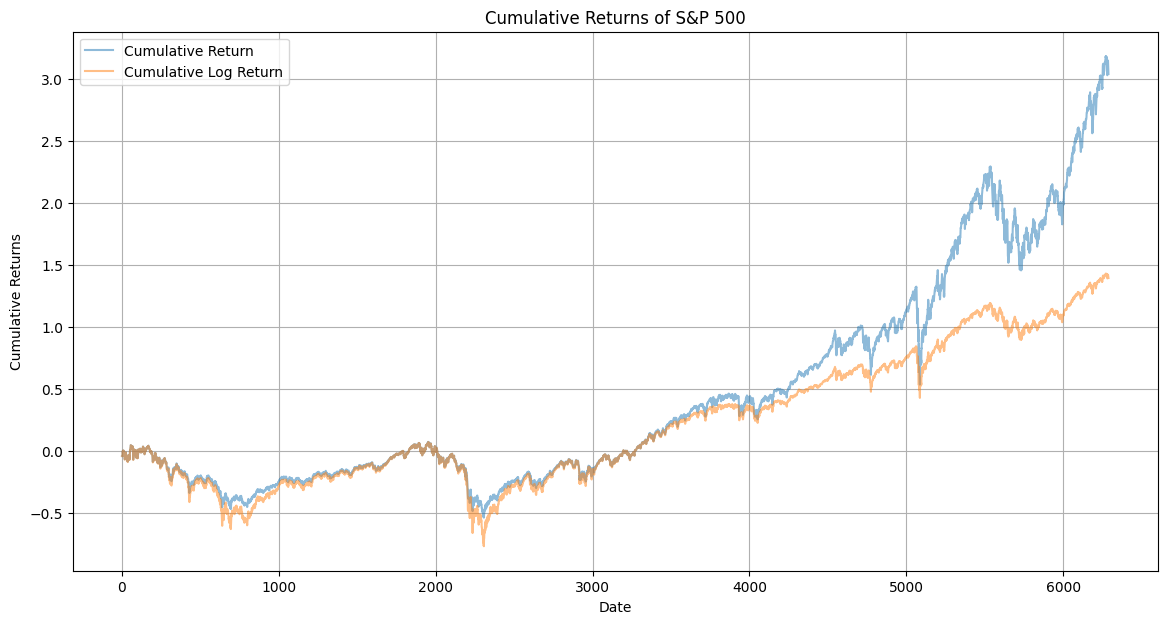

In [62]:
start_price = df['Close'].iloc[0]

# Calculate cumulative returns
df['Cumulative Return'] = (1 + df['Return']).cumprod() - 1
# Calculate cumulative log returns
df['Cumulative Log Return'] = df['Log Return'].cumsum()
# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(df['Cumulative Return'], label='Cumulative Return', alpha=0.5)
plt.plot(df['Cumulative Log Return'], label='Cumulative Log Return', alpha=0.5)
plt.title('Cumulative Returns of S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()